In [1]:
# import all libraries and magics
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
from sklearn.model_selection import KFold, train_test_split

from sklearn.datasets import load_diabetes
diabetes = load_diabetes(return_X_y=False)

print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

In [2]:


df_diabetes = pd.DataFrame(data=np.hstack((diabetes.target[:,np.newaxis],diabetes.data)), 
                  columns=['Target']+diabetes.feature_names)

df_diabetes

,Target,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,151.0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,75.0,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,141.0,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,206.0,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,135.0,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...,...
437,178.0,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,104.0,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,132.0,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,220.0,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [3]:

Train_data = np.array(df_diabetes.iloc[:,1:]) # training data location 
Targ_data = np.array (df_diabetes.iloc[:,0])  # target data location
print(Train_data)

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]]


In [4]:

X_train,X_test,t_train,t_test=train_test_split(Train_data,Targ_data,test_size=0.3,random_state=3)
print(t_test) # X_train for train data and t_train for target data

[ 53.  85.  47.  84. 174.  42.  44. 195. 150. 121. 143. 175. 219. 248.
  57.  50.  59. 166. 167. 134. 141. 118. 127. 171. 100. 144. 248. 198.
 214. 220. 310.  51. 129. 111. 151.  85. 154.  65.  66. 131. 302. 275.
  97. 178.  55.  71.  53. 242. 182. 202. 214.  88. 200. 178. 144. 230.
 200. 303. 281. 197. 210.  65.  43. 219. 170.  31.  99. 115.  93. 177.
  52. 183. 156. 184.  99.  59. 217.  77. 102. 103. 275. 276. 122. 273.
 132.  70.  71. 246.  77.  89. 160. 109. 198.  72. 274. 258. 121. 272.
 168. 128.  72. 280.  84. 172. 192. 181. 140. 127.  67. 232. 108. 125.
 332. 118. 109. 257. 308.  52. 164. 104.  79.  65.  52. 132. 225.  92.
 101.  90. 235. 186.  85. 245.  87.]


In [5]:
X_train.shape

(309, 10)

In [6]:

def LinearRegression_reg(x,t,lam):
    X = np.zeros((len(x), M+1))
    
    X[:,0] = 1
    
    X[:,1:] = np.array([x[:,m] for m in range(M)]).T
    #np.zeros(shape, dtype = None, order = 'C')
    #X = np.zeros((len(x), x.shape[1]))
    
    #X[:,0] = 1
    
    #X[:,1:] = np.array([x[:,m] for m in range(x.shape[1])]).T
    # Compute the solution for the parameters w
    w = np.linalg.inv(X.T@X+lam*np.eye(M+1))@X.T@t
    # Compute model prediction
    y= X@w
    return w, y

In [7]:
def  LinearRegression_test(x,w):
     #np.zeros(shape, dtype = None, order = 'C')
   # X = np.zeros((len(x), x.shape[1]))
    
    #X[:,0] = 1
    
    #X[:,1:] = np.array([x[:,1] for m in range(x.shape[1])]).T
    # Feature matrix for test set
    X = np.zeros((len(x), M+1))
    
    X[:,0] = 1
    
    X[:,1:] = np.array([x[:,m] for m in range(M)]).T
    #X = np.array([x**m for m in range(M+1)]).T
    
    # Prediction for test set
    y = X@w
    
    return y

In [8]:
from sklearn.model_selection import KFold
k = 5 # number of folds

kf = KFold(n_splits=k,shuffle=True)
kf

KFold(n_splits=5, random_state=None, shuffle=True)

In [9]:
# Split training feature matrix into training and validation sets

f=1
for train_index, validation_index in kf.split(X_train):
    print('Fold ', f)
    print('The training set has ', train_index.shape[0],' samples')
    print('Their index locations are: ', train_index)
    print('The validation set has ', validation_index.shape[0],' samples')
    print('Their index locations are: ', validation_index,'\n\n')
    f+=1

Fold  1
The training set has  247  samples
Their index locations are:  [  1   2   4   5   6   7   8   9  10  11  12  13  14  15  16  18  19  22
  23  24  25  26  27  28  29  30  31  32  35  37  38  39  40  43  45  46
  49  52  53  54  55  56  57  58  59  61  62  63  64  65  67  68  69  71
  73  74  76  77  78  80  81  82  83  84  85  86  88  89  90  91  92  93
  95  97  98 100 102 103 104 105 106 107 108 109 110 112 113 115 116 118
 120 122 123 124 125 127 128 129 131 132 133 134 135 137 138 139 140 141
 144 145 146 147 148 150 151 152 153 155 156 157 158 159 160 161 164 165
 167 168 169 170 171 172 173 175 176 178 179 180 181 182 184 186 187 188
 189 190 191 192 193 194 195 197 198 199 200 201 206 207 208 209 210 211
 212 213 214 216 217 218 219 220 221 222 223 224 225 226 227 228 231 232
 234 235 237 238 239 240 241 242 243 244 245 246 247 248 249 250 252 253
 254 255 257 258 260 261 262 263 264 265 266 267 268 269 271 272 274 275
 276 278 280 281 282 283 284 285 286 287 288 289 290 

In [10]:
M_vals = range(1,11) # model order
lam_vals= np.arange(0.1,1.1,0.1) # set of values for lambda
for M in M_vals:
    for lam in lam_vals:
        
        print('M values = ',M)
        print('lam Value = ',lam)
        
        # For each training/validation split
        f=1
        
        #initialize performance measures
        MSE_train_avg,MSE_val_avg = 0, 0
        
        for train_index, validation_index in kf.split(X_train):
            print('\nFold ',f)
            
            # Select training set using the indices found from kf.split
            X_train2, X_validation = X_train[train_index], X_train[validation_index]
            
            # Select validation set using the indices found from kf.split
            V_train2, V_validation = t_train[train_index], t_train[validation_index]
            
            # Training model with training set
            w, y_train = LinearRegression_reg(X_train2, V_train2, lam)
            
            # Evaluate trained model in validation set
            y_val =  LinearRegression_test((X_validation), w)
            
            # Performance Measure
            MSE_train = np.mean((V_train2-y_train)**2)
            MSE_val   = np.mean((V_validation-y_val)**2)
            
            # Average performance measure
            MSE_train_avg = MSE_train_avg+MSE_train
            MSE_val_avg = MSE_val_avg+MSE_val
            print('MSE Training = ', MSE_train)
            print('MSE Validation = ', MSE_val)
            f+=1
            
        print('\nAverage Performance in Training = ', MSE_train_avg/k)
        print('Average Performance in Validation = ', MSE_val_avg/k)
        print('-----------------------------------------------------\n')

M values =  1
lam Value =  0.1

Fold  1
MSE Training =  5819.43587132669
MSE Validation =  6033.128503359633

Fold  2
MSE Training =  5973.614297348296
MSE Validation =  5396.181138578041

Fold  3
MSE Training =  5858.959442221793
MSE Validation =  5879.632641220755

Fold  4
MSE Training =  5799.745270399899
MSE Validation =  6093.119982598885

Fold  5
MSE Training =  5803.758552348231
MSE Validation =  6038.191389180452

Average Performance in Training =  5851.102686728982
Average Performance in Validation =  5888.050730987553
-----------------------------------------------------

M values =  1
lam Value =  0.2

Fold  1
MSE Training =  5933.793374210828
MSE Validation =  5576.6346914292035

Fold  2
MSE Training =  5787.765659454521
MSE Validation =  6384.605534715086

Fold  3
MSE Training =  5799.233604642545
MSE Validation =  6145.212621160668

Fold  4
MSE Training =  5972.1975325340845
MSE Validation =  5499.521388224796

Fold  5
MSE Training =  5783.923564258841
MSE Validation =  6

In [11]:
intercept = w[0];
coefficient = w[1:];
print("T_intercept: ", intercept)
print("Variables_coefficent: ", coefficient)

T_intercept:  152.08291359218416
Variables_coefficent:  [  53.75262259  -66.56684992  214.84888013  162.57364511   24.06283289
   -8.60050119 -121.52221608  106.05727624  214.71192105  115.79769748]


<StemContainer object of 3 artists>

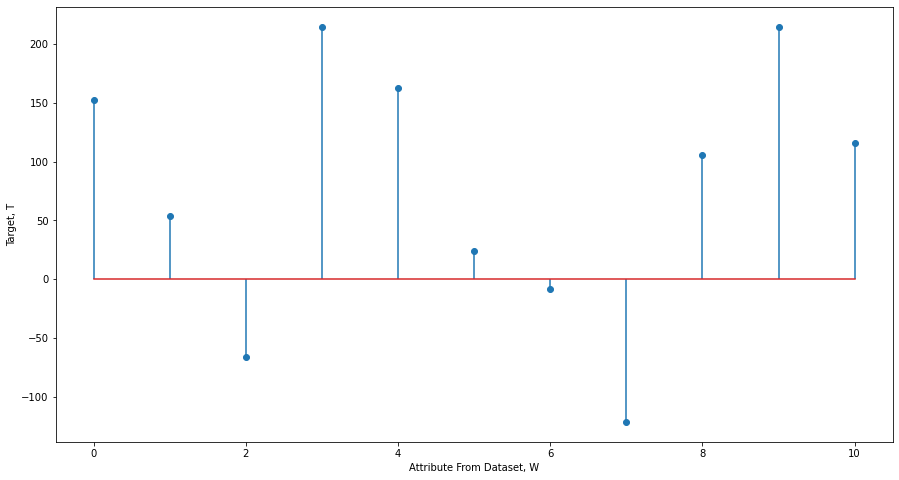

In [12]:
# graph plot
m = [i for i in range(M+1)]
fig = plt.figure(figsize = (15,8))
plt.xlabel('Attribute From Dataset, W')
plt.ylabel('Target, T');
plt.stem(m,w)

# Answer 1.5

# Observation from above graph shows that the BMI which is the index 3rd variable from the data gives better contribution to result variable.

# Answer 2

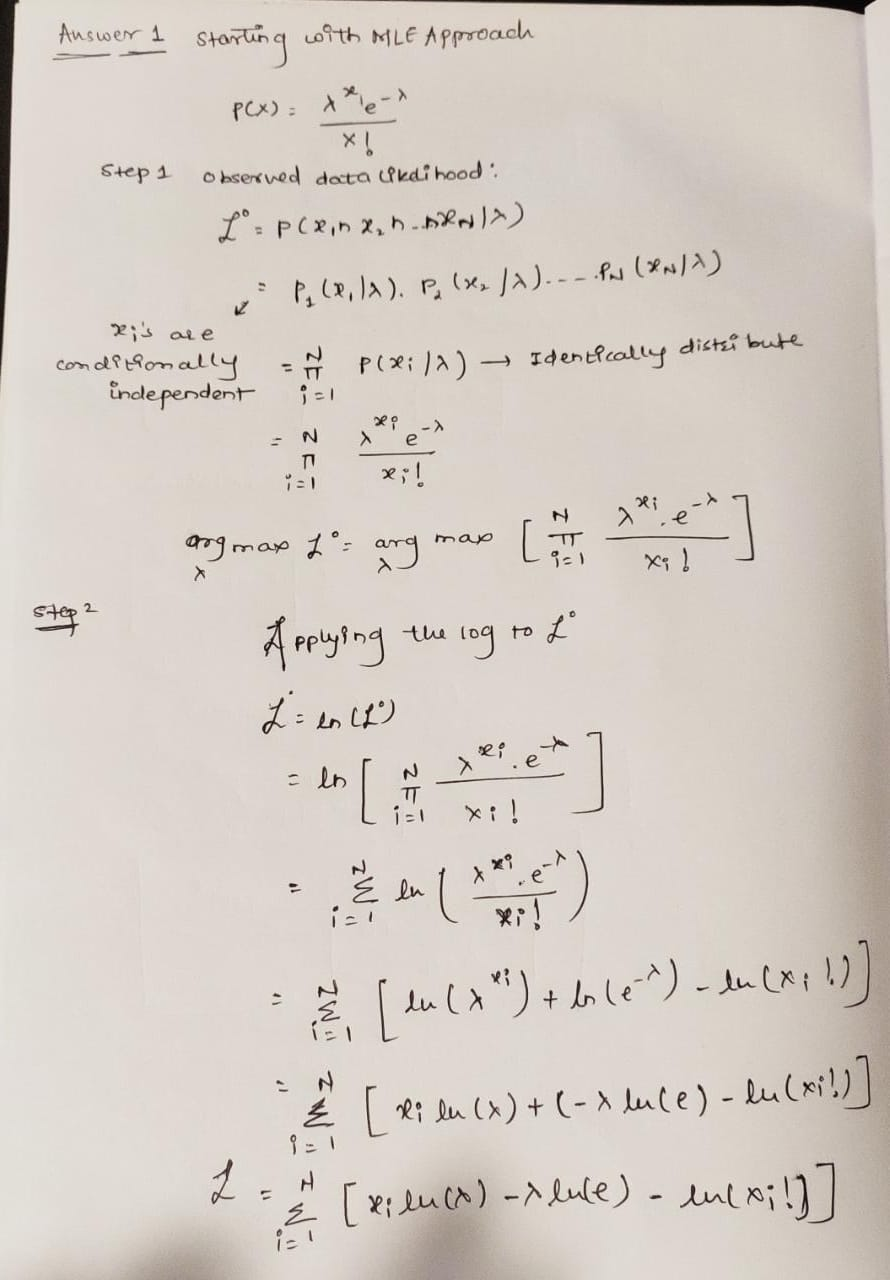

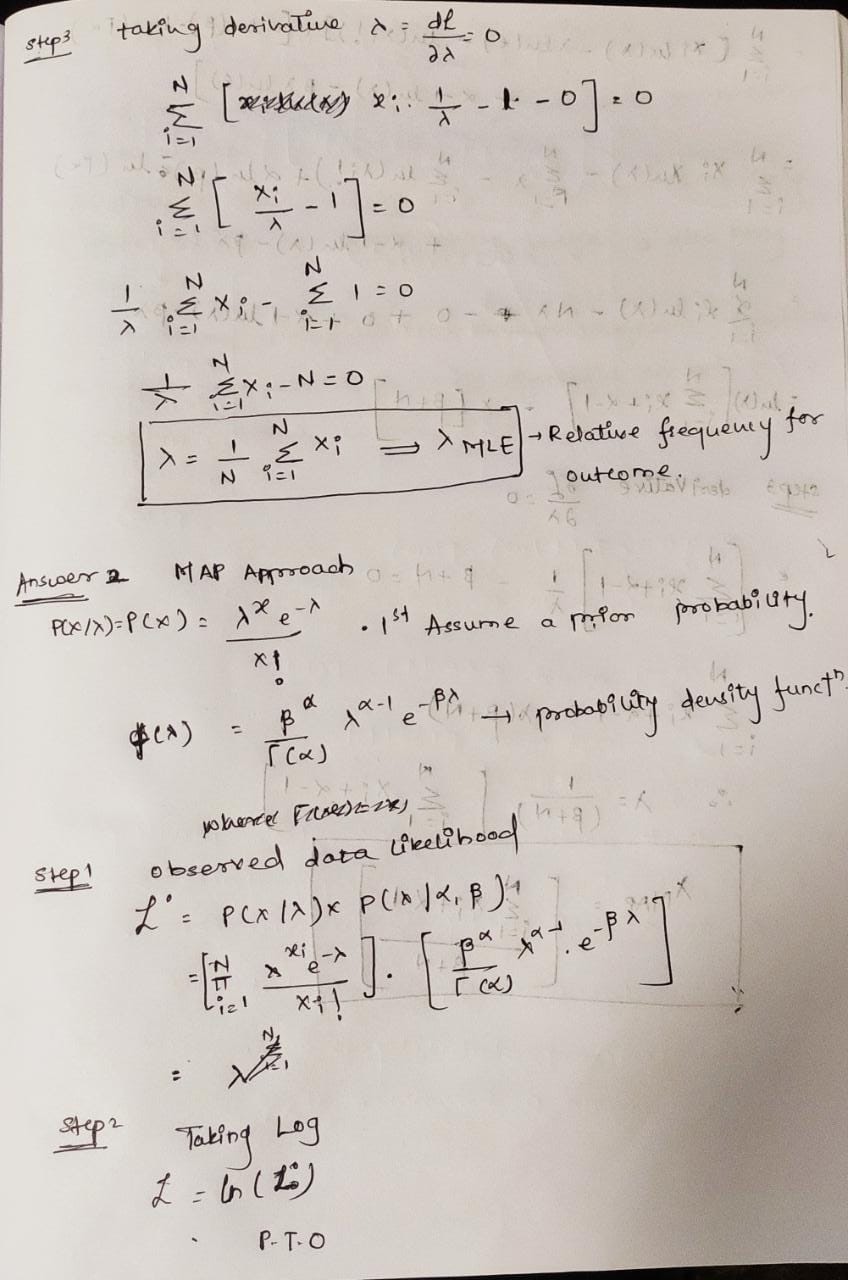

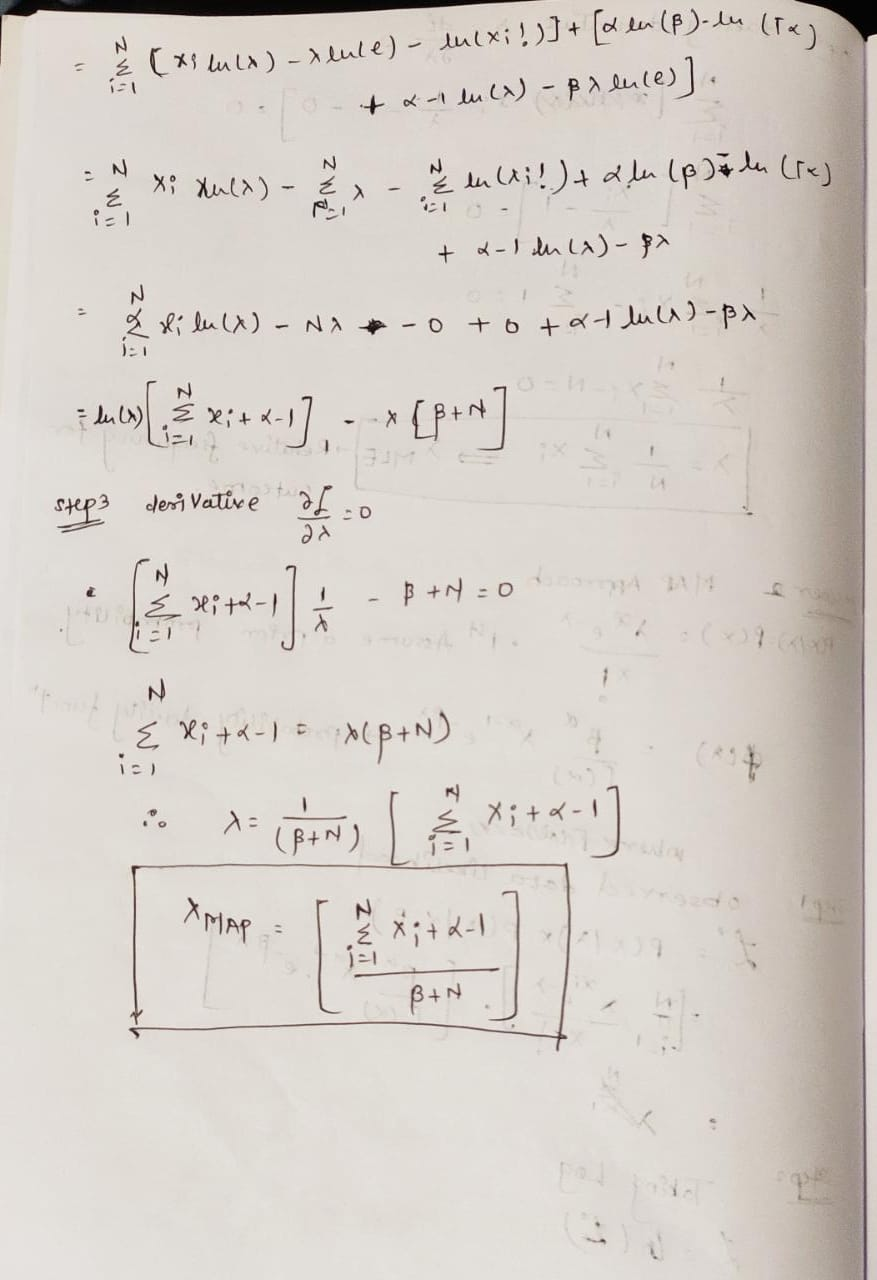

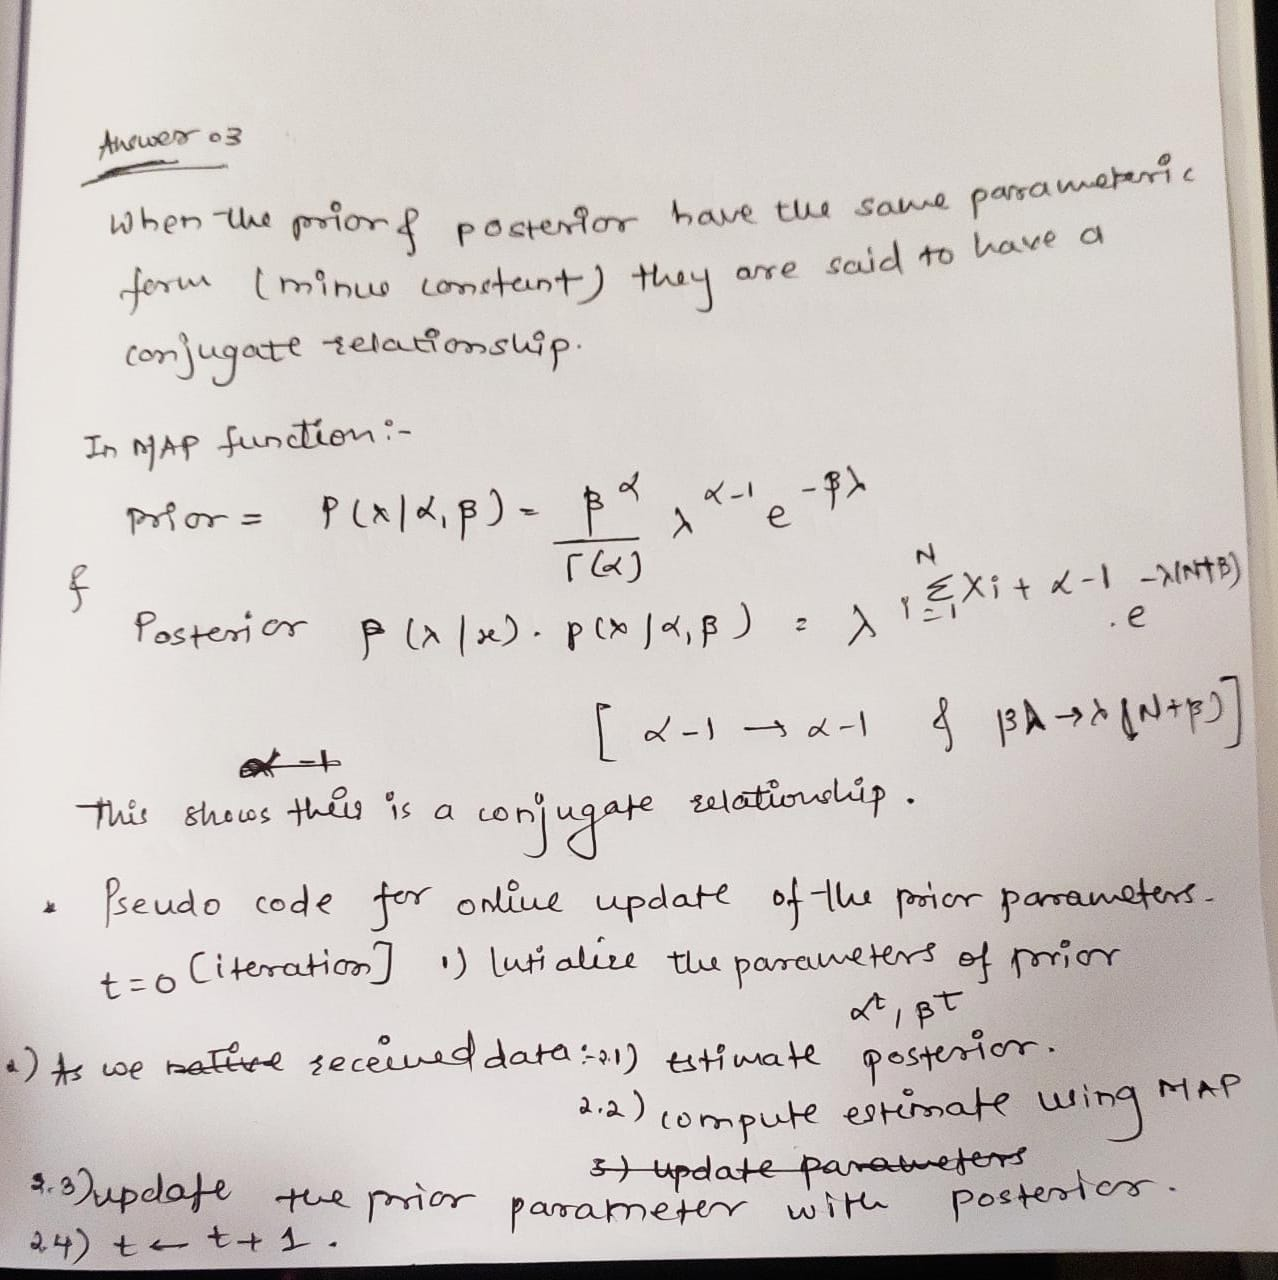

In [13]:
Hourly_data = np.load('hourly_trips.npy')
print(Hourly_data)


[12.17344238  5.8976769  10.09288813 10.85481625  7.45158821 17.47262593
  6.87315695 11.02015058  9.07458416  9.46782007 12.27498646 11.05131386
  9.65919717 14.40592594 11.28330506 10.78276237  5.22024029  2.77506291
  9.23150599 11.09444906  3.44521082 11.81461499  9.80280355 15.5576354
 10.64793568 16.51397478  8.3705716   6.30898303  6.12021232  7.83973581
  7.98557616  9.57437964 15.9645852   5.76696426 10.68593847  7.53459078
  7.62981818 12.37469023  9.66358416 11.03404619  6.69875976 16.2512253
  9.35473644 16.27262865  9.96016951 16.07063925 17.57168862 14.49531879
 12.22298801  6.17275514 16.27444745  6.65888103  6.07650946  8.66720522
 14.03976257  5.5247268  15.05866389  6.48257035  6.76692726  8.3506876
  7.67781713  7.19433818  5.74651419 18.19129846  8.02287518 12.11372082
 10.06196759 15.15762246  7.78066655  6.15448655  6.35807171 12.33238152
  9.25873527 13.84738345  3.90609314 15.49533769 12.4406353   8.53337475
  9.84024114  0.61383166 10.23911142  2.67881008  4.67

# Answer 2.4

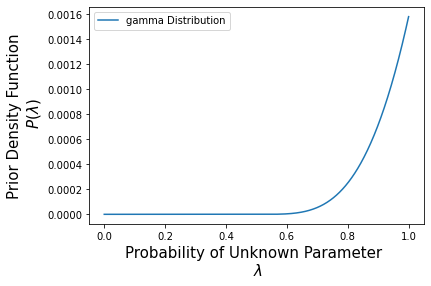

In [14]:
a = 5
b = 0.5
gamma =stats.gamma(a,b)
x = np.linspace(0,1,1000)
plt.plot(x, gamma.pdf(x), label='gamma Distribution')
plt.legend(loc='best')
plt.xlabel('Probability of Unknown Parameter \n $\lambda$',fontsize=15)
plt.ylabel('Prior Density Function\n $P(\lambda)$',fontsize=15);

In [15]:
#import scipy.stats as stats

#true_lambda = 10 # 0.5 for a fair coin

#Num_Trails = 120

#Outcomes = Hourly_data
#for i in range(Num_Trails):
    #Outcomes += Hourly_data
   # print(Outcomes)
   # print('MLE (Frequentist, data-driven): Probability of Unknown Parameter = ', np.sum(Outcomes)/len(Outcomes))
   # print('MAP (Bayesian, uses prior): Probability of Unknown Parameter = ', (np.sum(Outcomes)+a-1)/(len(Outcomes)+a+b-2))
    #input('Press enter to flip the coin again...\n')

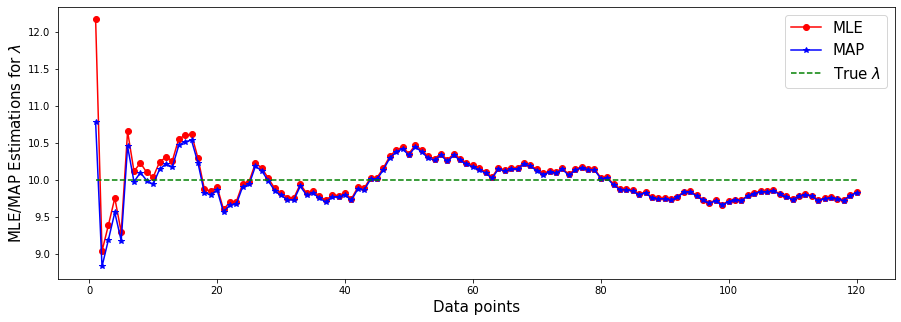

In [16]:
# True value of the unknown parameter
true_lambda = 10 # 0.5 for a fair coin

# Prior Initial Parameters
a= 5 # alpha
b= 0.5 # beta

# Sampling Training Data
Num_Trails = 120
# Computing MLE and MAP estimates as data is being collected
Lambda_MLE = []
Lambda_MAP = []
for i in range(1,Num_Trails+1):
    Lambda_MLE += [np.sum(Hourly_data[:i])/len(Hourly_data[:i])]
    Lambda_MAP += [(np.sum(Hourly_data[:i])+a-1)/(len(Hourly_data[:i])+b)]

# Plotting estimates
plt.figure(figsize=(15,5))
plt.plot(range(1,Num_Trails+1), Lambda_MLE, '-or', label='MLE')
plt.plot(range(1,Num_Trails+1), Lambda_MAP, '-*b', label='MAP')
plt.plot(range(1,Num_Trails+1), [true_lambda]*Num_Trails, '--g', label='True $\lambda$')
plt.xlabel('Data points',size=15)
plt.ylabel('MLE/MAP Estimations for $\lambda$',size=15)
plt.legend(fontsize=15);

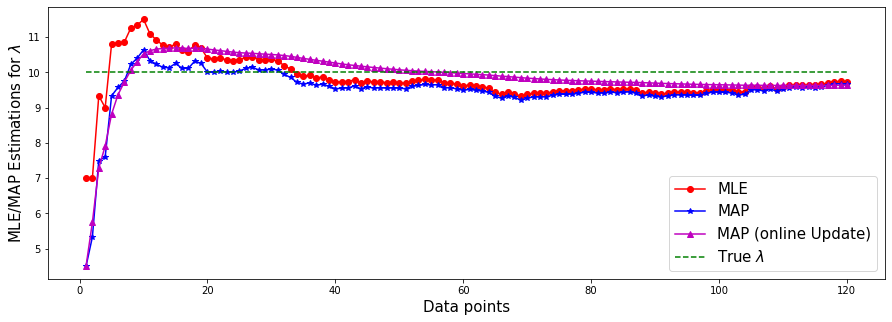

In [17]:
# True value of the unknown parameter
true_lambda = 10 # 0.5 for a fair coin

# Prior Initial Parameters
a= 3 ; alpha_prior = a
b= 1 ; beta_prior  = b

# Sampling Trainin
Num_Trails = 120

Outcomes = stats.poisson(true_lambda).rvs(Num_Trails)

# Computing MLE and MAP estimates as data is being collected
Lambda_MLE = []
Lambda_MAP = []
Lambda_MAP_New = []
for i in range(1,Num_Trails+1):
    Lambda_MLE += [np.sum(Outcomes[:i])/len(Outcomes[:i])]
    Lambda_MAP += [(np.sum(Outcomes[:i])+ alpha_prior-1)/(len(Outcomes[:i])+beta_prior)]
    Lambda_MAP_New += [(np.sum(Outcomes[:i])+a-1)/(len(Outcomes[:i])+b)]
    a += (np.sum(Outcomes[:i]))
    b +=  (len(Outcomes[:i]))

# Plotting estimates
plt.figure(figsize=(15,5))
plt.plot(range(1,Num_Trails+1), Lambda_MLE, '-or', label='MLE')
plt.plot(range(1,Num_Trails+1), Lambda_MAP, '-*b', label='MAP')
plt.plot(range(1,Num_Trails+1), Lambda_MAP_New, '-^m', label='MAP (online Update)')
plt.plot(range(1,Num_Trails+1), [true_lambda]*Num_Trails, '--g', label='True $\lambda$')
plt.xlabel('Data points',size=15)
plt.ylabel('MLE/MAP Estimations for $\lambda$',size=15)
plt.legend(fontsize=15)

